In [1]:
import librosa
from librosa.feature import melspectrogram
from librosa.core import load
from librosa.display import specshow
from librosa import power_to_db

import matplotlib.pyplot as plt

from utils.preprocessing import extract_log_mel_feats

In [12]:

train_folder = 'E:/stady/aaa/train/'
# test_folder = './data/audio_test/'

sample_rate = 11025
fft_size = 1024
overlap = 4
hop = fft_size // overlap
mels = 64

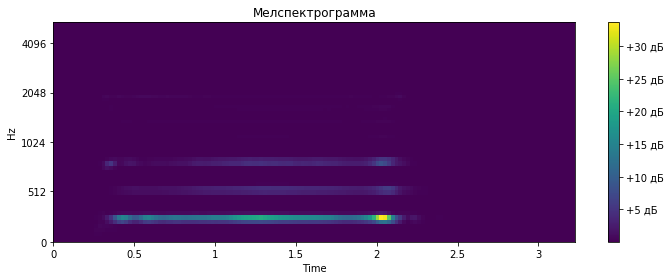

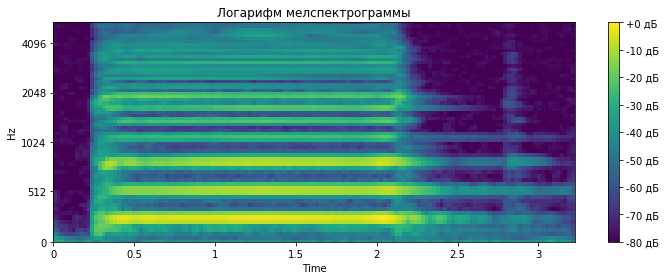

In [16]:
import os
import numpy as np

wav_data, sr = load(os.path.join(train_folder, '00abfb8903f34a38d7c3.wav'), sr=sample_rate)
mel_spec = melspectrogram(wav_data, n_fft=fft_size, hop_length=hop, n_mels=mels, 
                          fmax=sample_rate//2)

plt.figure(figsize=(10, 4))
colors = 'viridis'
specshow(mel_spec, y_axis='mel', fmax=sample_rate//2, x_axis='time', cmap=colors)
plt.colorbar(format='%+2.0f дБ')
plt.title('Мелспектрограмма')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
specshow(power_to_db(mel_spec, ref=np.max), y_axis='mel',
         fmax=sample_rate//2, x_axis='time', cmap=colors)
plt.colorbar(format='%+2.0f дБ')
plt.title('Логарифм мелспектрограммы')
plt.tight_layout()
plt.show()

In [25]:
path_to_csv = os.path.join('E:/stady/aaa/', 'train.csv')
pickle_train_path = os.path.join('E:/stady/aaa/', 'train.pickle')
# pickle_test_path = os.path.join('./data', 'test.pickle')

label_to_id = extract_log_mel_feats('train', path_to_csv, train_folder, pickle_train_path, sample_rate, fft_size, hop, mels)
id_to_label = [label for label, i in label_to_id.items()]

# extract_log_mel_feats('test', '', test_folder, pickle_test_path, sample_rate, fft_size, hop, mels)

In [33]:
print(id_to_label)

['Acoustic_guitar', 'Applause', 'Bark', 'Bass_drum', 'Burping_or_eructation', 'Bus', 'Cello', 'Chime', 'Clarinet', 'Computer_keyboard', 'Cough', 'Cowbell', 'Double_bass', 'Drawer_open_or_close', 'Electric_piano', 'Fart', 'Finger_snapping', 'Fireworks', 'Flute', 'Glockenspiel', 'Gong', 'Gunshot_or_gunfire', 'Harmonica', 'Hi-hat', 'Keys_jangling', 'Knock', 'Laughter', 'Meow', 'Microwave_oven', 'Oboe', 'Saxophone', 'Scissors', 'Shatter', 'Snare_drum', 'Squeak', 'Tambourine', 'Tearing', 'Telephone', 'Trumpet', 'Violin_or_fiddle', 'Writing']
